['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')
   Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  current_year  
0       Manual      0          2020  
1       Manual      0          2020  
2       Manu

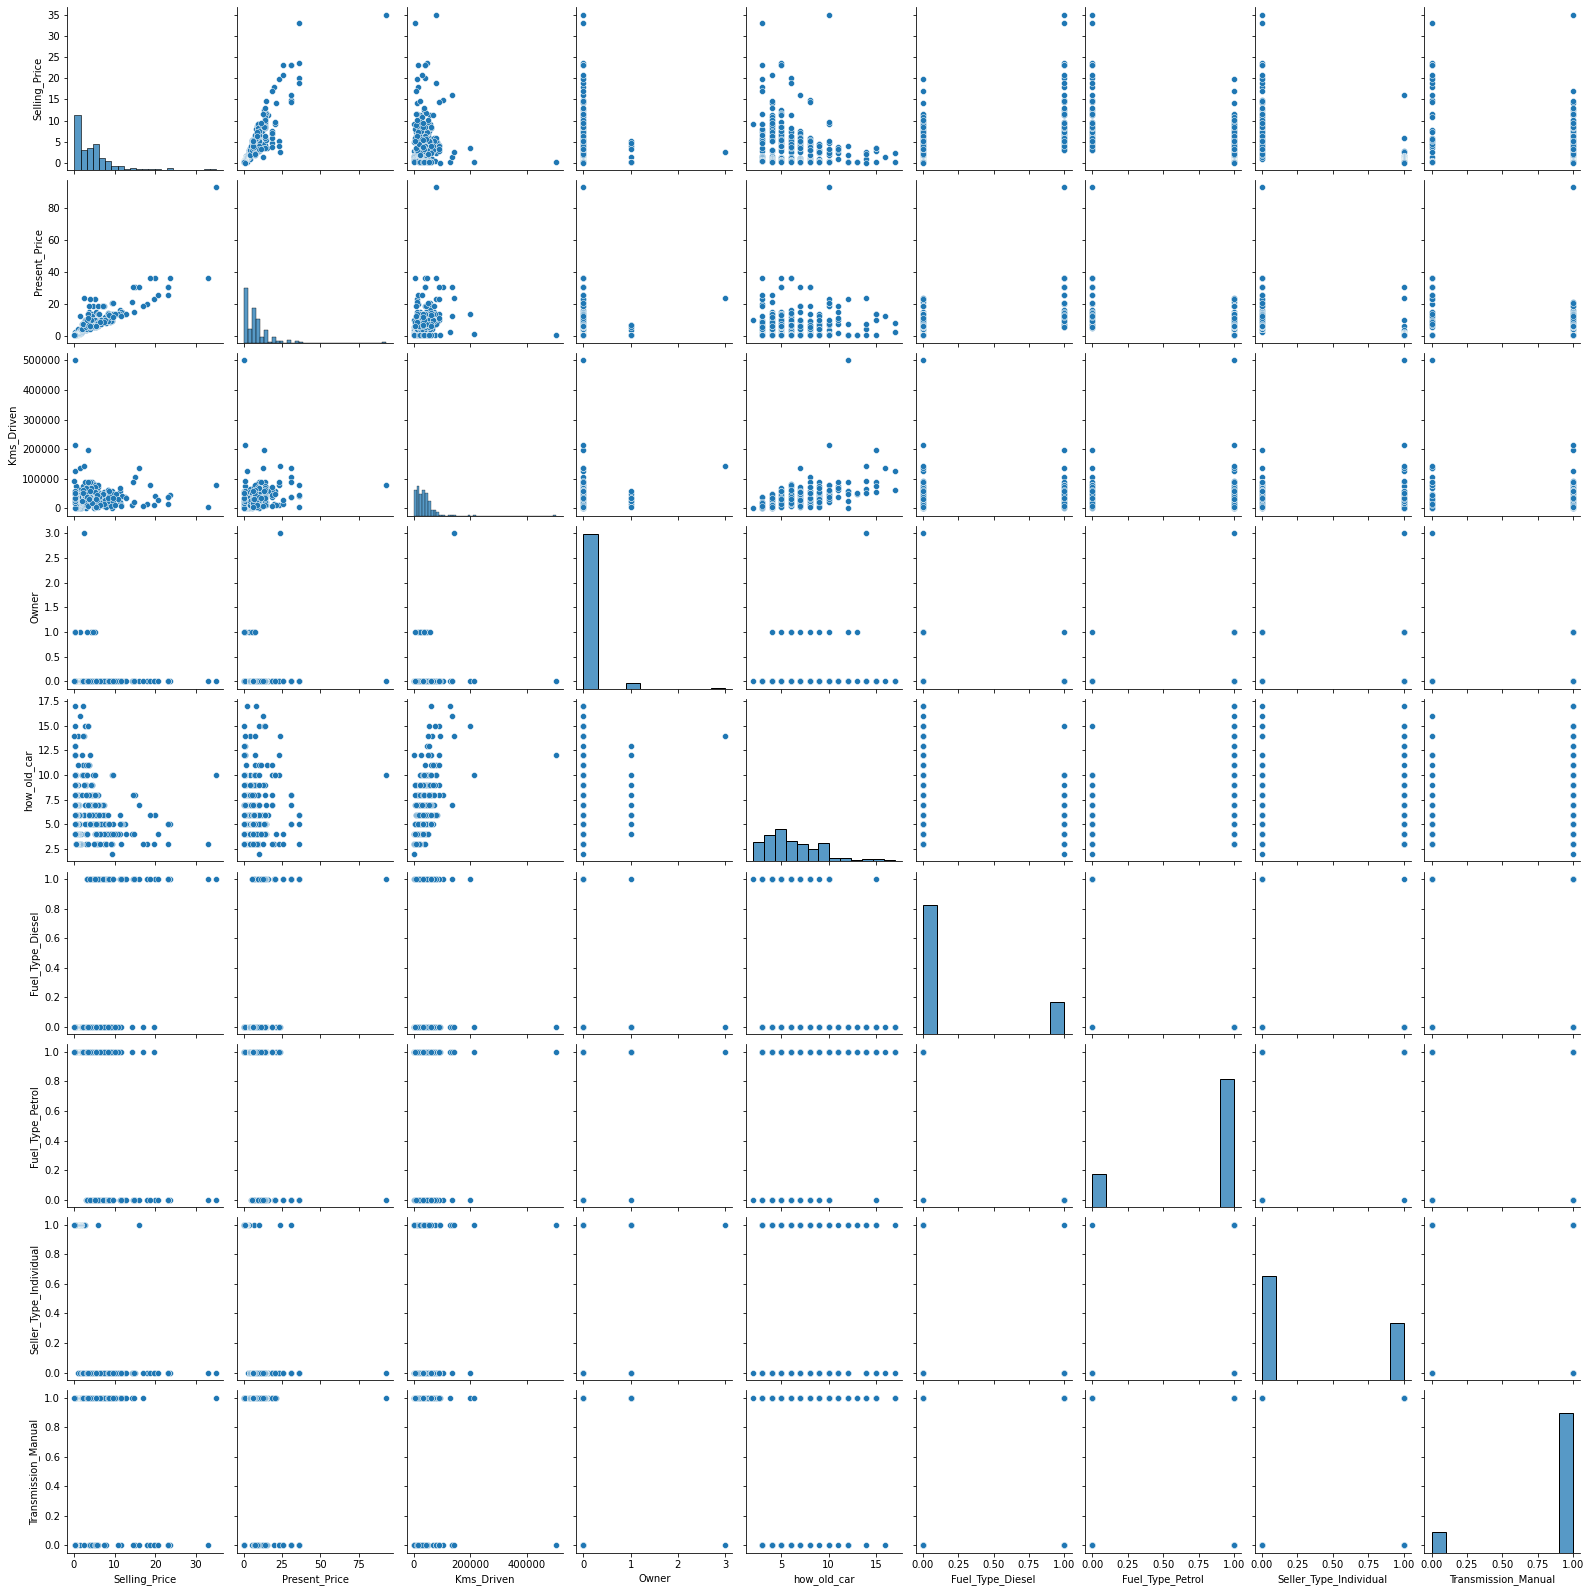

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('car data.csv')
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

# check for null value
print(df.isnull().sum())
# to find how old the car is 
print(df.columns)
features = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
features['current_year']=2020
print(features.head())
features['how_old_car']=features['current_year']-features['Year']
# print(features.head())
features.drop(['Year'],axis=1,inplace=True)
features.drop(['current_year'],axis=1,inplace=True)
print(features.head())
features=pd.get_dummies(features,drop_first=True)
# to get relation btw columns
print(features.corr())
# to represent this realation graphically we use seaborn library
import seaborn as sns 
sns.pairplot(features)

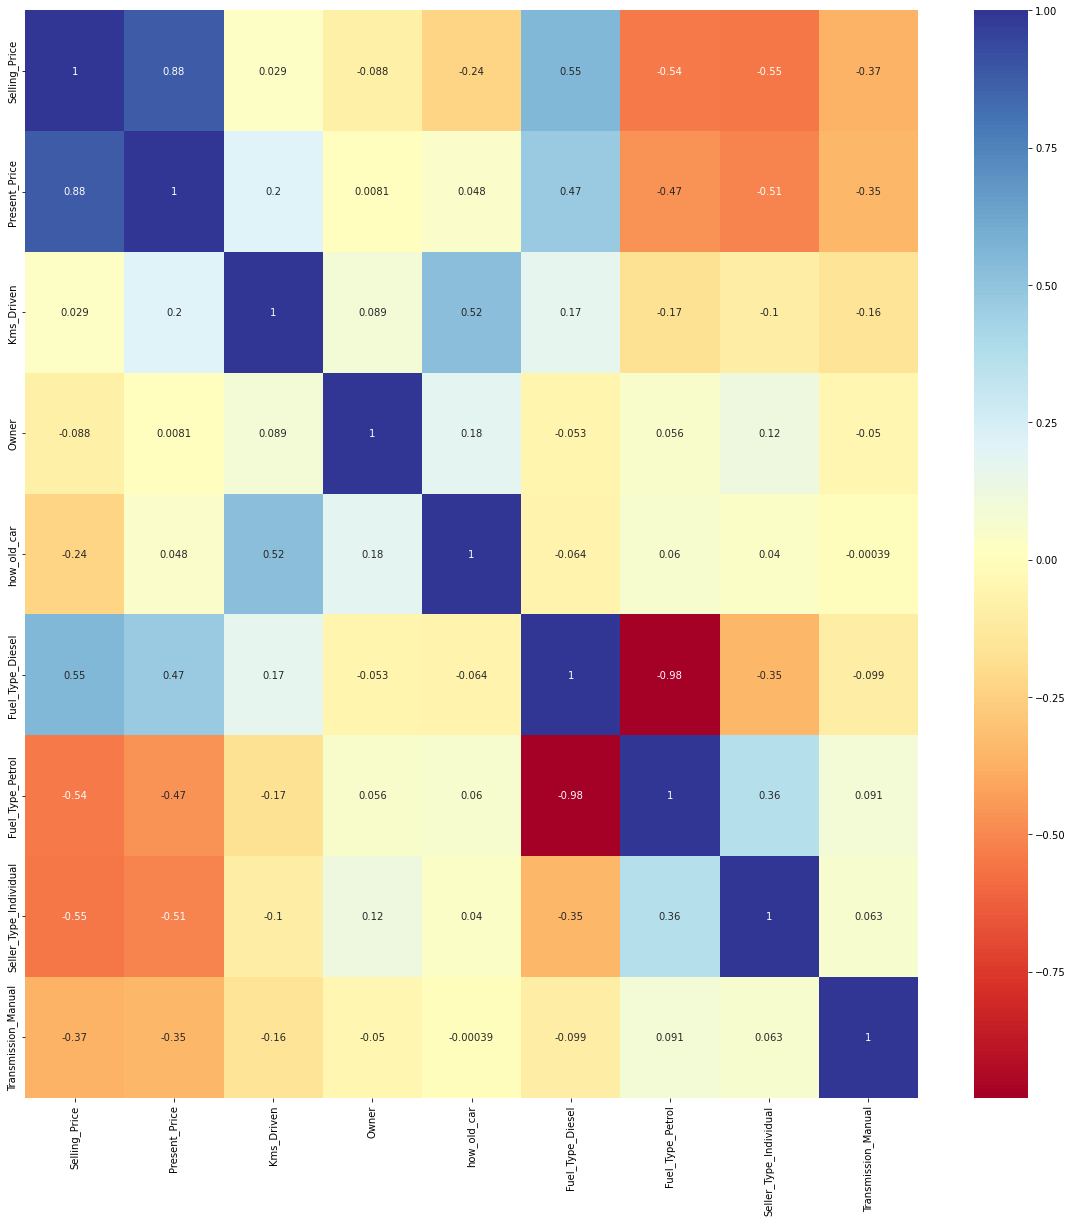

In [38]:
corrmat=features.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="RdYlBu")

In [37]:
X=features.iloc[:,1:]
y=features.iloc[:,0]


In [42]:

X.head

<bound method NDFrame.head of      Present_Price  Kms_Driven  Owner  how_old_car  Fuel_Type_Diesel  \
0             5.59       27000      0            6                 0   
1             9.54       43000      0            7                 1   
2             9.85        6900      0            3                 0   
3             4.15        5200      0            9                 0   
4             6.87       42450      0            6                 1   
..             ...         ...    ...          ...               ...   
296          11.60       33988      0            4                 1   
297           5.90       60000      0            5                 0   
298          11.00       87934      0           11                 0   
299          12.50        9000      0            3                 1   
300           5.90        5464      0            4                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1               

In [43]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(model.feature_importances_)

[0.37025831 0.0376649  0.00068686 0.07751324 0.23501854 0.01324903
 0.12496562 0.14064351]


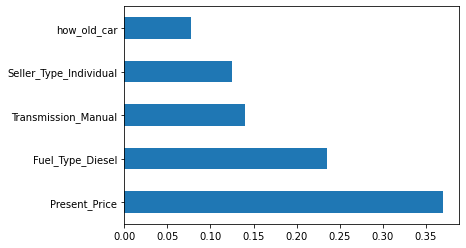

In [46]:
# present price higher importance
# to show trhe graph
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [53]:
# hyperparameters
import numpy as np
# number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start =10,stop=120,num=12)]
print(n_estimators)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]


In [54]:
# number of features to consider at every split
max_features =['auto','sqrt']
# maximum number of level in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# minimum number of samples require to split a node
min_samples_split=[3,15,20,75,100]
# minimum number of samples requirec at each leaf node
min_samples_leaf=[1,3,15,20]


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [3, 15, 20, 75, 100], 'min_samples_leaf': [1, 3, 15, 20]}


In [62]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10 , cv=5, verbose=2, random_state=42, n_jobs=1)

In [63]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=90; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=90; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=90; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=110; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=110; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 15, 20],
                                        'min_samples_split': [3, 15, 20, 75,
                                                              100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
predictions=rf_random.predict(X_test)
print(predictions)

[ 2.73483333  7.53419167  7.98661405  0.52462762 10.41316143  8.41066833
  1.00195     6.3227      7.38243333  0.95364833 21.74539286  4.361985
  8.69954333  0.61998357  7.183175    4.51058333  0.62181167  4.124675
 10.78647024  0.92976833  3.5860994   0.52710619  4.30288333  1.04049167
  0.49787     7.56745833  0.81270762  4.57329167  7.41835833 19.85743405
  2.76542333  3.491175    2.75978929  0.73417595  9.18005048  4.21541667
  0.61701833  4.40030476  4.21078333  0.33395143  2.64822619  0.68027381
  7.14433571  7.73709     5.45439643  1.04496548  3.88960833  6.99407857
  4.740925    8.59755     0.93124571  9.41233167  0.54818     0.52971333
  2.65246786  0.95870333  2.97456667 10.05760714  7.46367083  3.93419167
  6.79488333]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

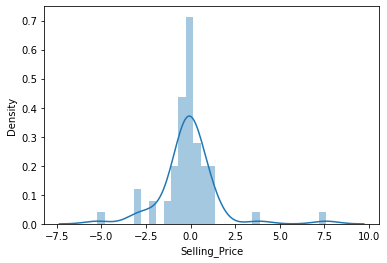

In [67]:
sns.distplot(y_test-predictions)

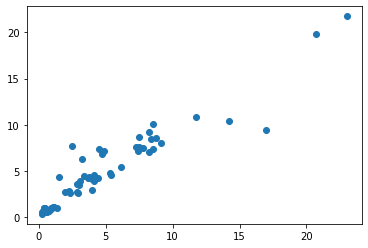

In [68]:
plt.scatter(y_test,predictions)

In [69]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
